<img src="images/logodwengo.png" alt="Banner" width="150"/>

<div>
    <font color=#690027 markdown="1">  
        <h1>LINEAIRE REGRESSIE - TOEPASSING TRENDLIJN - DISNEYLAND PARIJS</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
In deze notebook krijg je data voorgeschoteld van het aantal bezoekers van Disneyland Parijs. <br>
    - Je bepaalt de mate van samenhang a.d.h.v. de correlatiecoëfficiënt.<br>
    - Je bepaalt de vergelijking van de trendlijn. <br>
    - Je stelt de gegeven data en de trendlijn duidelijk voor op een grafiek. 
</div>

### Opdracht
Je beschikt voor deze notebook over een csv-file die cijfers hierover bevat. In de data kan je een trend waarnemen: je ziet hoe het aantal bezoekers verandert in fucntie van het jaartal. <br>
Je vindt het bestand in de map `data`: `eurodisney.csv`. 

- Lees de data in. 

Vervolgens bepaal je:
- de mate van samenhang tussen het jaartal (voor de periode 1992-**2019**) en het aantal bezoekers;
- de vergelijkingen van de regressielijn (trendlijn) voor de bezoekers in functie van het jaartal. <br>

Tot slot stel je de gegeven data en de trendlijn duidelijk voor op een grafiek.
- Welke trend komt tevoorschijn in de data?
- Hoeveel bezoekers had men, als de trend zich had voortgezet, kunnen verwachten in 2020? 
- Vergelijk dit met het werkelijk aantal bezoekers.

# Voorbeeldoplossing

### Nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit    # voor regressie

<div>
    <font color=#690027 markdown="1">  
        <h2>1. Data inlezen en visualiseren</h2> 
    </font>
</div>

In [2]:
# voorbeeldscript
disney = pd.read_csv("data/eurodisney.csv")
disney

,jaar,aantal bezoekers (in 1000-tal)
0,1992,10000
1,1993,9800
2,1994,8800
3,1995,10700
4,1996,11700
5,1997,12600
6,1998,12500
7,1999,12500
8,2000,12000
9,2001,12200


In [3]:
# voorbeeldscript
# kolommen apart inlezen en in juiste gedaante brengen
x = disney["jaar"]
y = disney["aantal bezoekers (in 1000-tal)"]

x = np.array(x)
y = np.array(y)

In [4]:
# voorbeeldscript
# data van 2020 verwijderen
x = np.delete(x, 28)
y = np.delete(y, 28)

In [5]:
# voorbeeldscript
# minima en maxima bepalen
x_min = x.min()
x_max = x.max()
y_min = y.min()
y_max = y.max()

print(x_min, x_max, y_min, y_max)

1992 2019 8400 12740


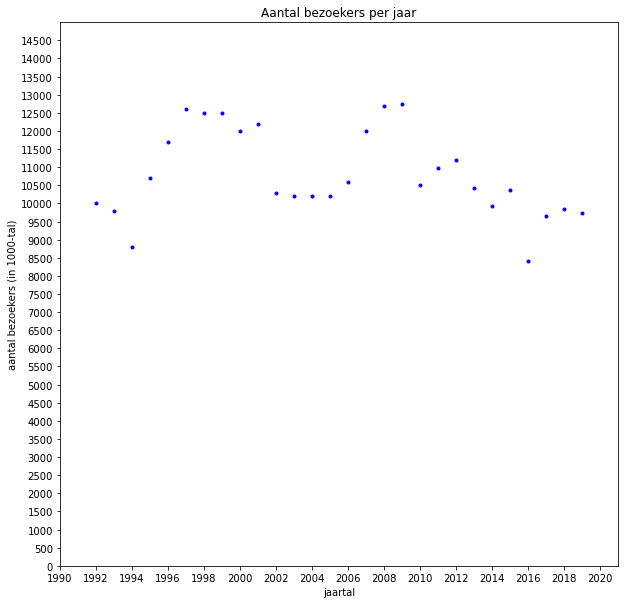

In [6]:
# voorbeeldscript
# puntenwolk
plt.figure(figsize=(10,10))                          # creëer tekenvenster

plt.axis(xmin=1990, xmax=2021, ymin=0, ymax=15000)   # vensterinstellingen  
plt.xticks(np.arange(1990, 2022, step=2))
plt.yticks(np.arange(0, 15000, step=500))
plt.title("Aantal bezoekers per jaar")
plt.xlabel("jaartal")
plt.ylabel("aantal bezoekers (in 1000-tal)")

plt.scatter(x, y, color="blue", marker=".")          # plot puntenwolk

plt.show()                                           # toon grafiek

<div>
    <font color=#690027 markdown="1">  
        <h2>2. De correlatiecoëfficiënt</h2> 
    </font>
</div>

In [7]:
# voorbeeldscript
print("Correlatiecoëfficiënt R =", np.corrcoef(x, y)[0,1])      

Correlatiecoëfficiënt R = -0.2682568161384184


Interpretatie: De puntenwolk kan gezien worden als ellipsvormig, zij het twijfelachtig. Rekening houdend met de correlatiecoëfficiënt wijst dit op een *negatieve zwakke lineaire samenhang* tussen het jaartal en het aantal bezoekers.<br>
Het aantal bezoekers kent dus een *licht dalende trend*.

<div>
    <font color=#690027 markdown="1">  
        <h2>3. Lineaire regressie</h2> 
    </font>
</div>

In [8]:
# voorbeeldscript
# regressielijn is rechte

# ingeven hoe vergelijking rechte is opgebouwd 
def rechte(x, a, b):
    """Voorschrift (schuine) rechte met variabele x en coëfficiënten a en b."""
    return a * x + b

# rechte zoeken die beste past bij bepaalde data, vergelijking tonen en coëfficiënten teruggeven
def linreg(x, y):
    """Rechte best passend bij data x en y."""
    popt, pcov = curve_fit(rechte, x, y)         # curve_fit() kijkt in def rechte() hoe functievoorschrift eruitziet
    # curve_fit() geeft twee zaken terug, waaraan gerefereerd wordt met popt en pcov
    # enkel eerste nodig, die a en b van gezochte rechte geeft
    a, b = popt                                  # coëfficiënten
    print("y = ", a, "x +", b)                   # toon vergelijking regressielijn
    return a, b                                  # geeft coëfficiënten terug van vergelijking regressielijn

In [9]:
# voorbeeldscript
# coëfficiënten regressielijn bij gegeven punten
a, b = linreg(x, y)                

y =  -39.42255062954087 x + 89876.06814470634


<div>
    <font color=#690027 markdown="1">  
        <h2>4. Grafiek</h2> 
    </font>
</div>

In [10]:
# voorbeeldscript
y_regressielijn = rechte(x, a, b)       # y_regressielijn verwijst naar lijst y-waarden van punten gelegen op regressielijn

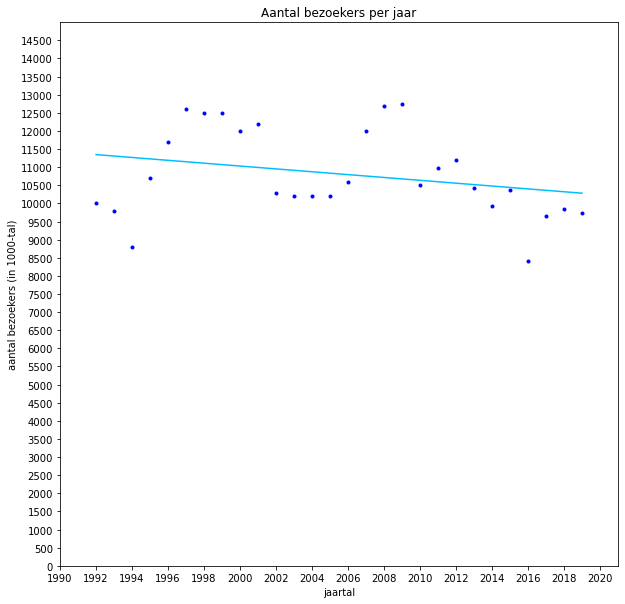

In [11]:
# voorbeeldscript
# grafiek puntenwolk met trendlijn
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=1990, xmax=2021, ymin=0, ymax=15000)  # vensterinstellingen  
plt.xticks(np.arange(1990, 2022, step=2))
plt.yticks(np.arange(0, 15000, step=500))
plt.title("Aantal bezoekers per jaar")
plt.xlabel("jaartal")
plt.ylabel("aantal bezoekers (in 1000-tal)")

plt.scatter(x, y, color="blue", marker=".")         # plot puntenwolk
plt.plot(x, y_regressielijn, color="deepskyblue")   # plot regressielijn


plt.show()                                          # toon grafiek

Opmerking: Het spreidingsdiagram wijst ook op terugkomende schommelingen in het bezoekersaantal. Die schommelijngen worden niet weerspiegeld in de gezochte trendlijn. Er is een ander wiskundig model nodig, een kromme, om die schommelingen in het model mee te nemen.

<div>
    <font color=#690027 markdown="1">  
        <h2>5. 2020</h2> 
    </font>
</div>

Uit de data blijkt dat er in 2020 slechts 1 920 000 bezoekers waren, dus bijna twee miljoen.  <br>
Met de volgende code wordt berekend hoeveel men er kon verwachten als de trend zich had doorgezet: 

In [12]:
a * 2020 + b

10242.515873033772

Antwoord: Er werden 10 243 000 bezoekers verwacht in 2020. Meer dan 5 keer zoveel als er kwamen. 

<div>
    <h2>Referentielijst</h2> 
</div>

[1] Grommen, S. (20 augustus 2018). Waatom Bpost de postbedeling wil omgooien: de tanende brievenpost in cijfers. <br> &nbsp; &nbsp; &nbsp; &nbsp;https://en.wikipedia.org/wiki/Disneyland_Paris

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook Python in wiskunde, zie Computationeel denken - Programmeren in Python van <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière, in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 